In [2]:
import itertools
import pandas as pd
from modules.eval import *

In [ ]:
plt.rcParams["font.family"] = "Georgia"

In [3]:
pt1_dft_forces_fc = load('results/fair-chem/eqV2-M/pt1_dft_forces.pkl')
pt1_dft_energies_fc = load('results/fair-chem/eqV2-M/pt1_dft_energies.pkl')
pt1_predicted_forces_fc = load('results/fair-chem/eqV2-M/pt1_predicted_forces.pkl')
pt1_predicted_energies_fc = load('results/fair-chem/eqV2-M/pt1_predicted_energies.pkl')

In [4]:
pt2_dft_forces_fc = load('results/fair-chem/eqV2-M/pt2_dft_forces.pkl')
pt2_dft_energies_fc = load('results/fair-chem/eqV2-M/pt2_dft_energies.pkl')
pt2_predicted_forces_fc = load('results/fair-chem/eqV2-M/pt2_predicted_forces.pkl')
pt2_predicted_energies_fc = load('results/fair-chem/eqV2-M/pt2_predicted_energies.pkl')

In [7]:
pt1 = [pt1_dft_forces_fc,pt1_dft_energies_fc,pt1_predicted_forces_fc,pt1_predicted_energies_fc]
pt2 = [pt2_dft_forces_fc,pt2_dft_energies_fc,pt2_predicted_forces_fc,pt2_predicted_energies_fc]

In [8]:
concat = []
for file_pt1,file_pt2 in zip(pt1,pt2):
    file_pt1 += file_pt2
    concat.append(file_pt1)

In [11]:
dft_forces,dft_energies,pred_forces,pred_energies = concat

In [ ]:
abs_dft_forces = [i[1] for i in dft_forces]
abs_pred_forces = [i[1] for i in pred_forces]

In [42]:
arr = eval_report(np.array(dft_energies),np.array(pred_energies))
for i in arr: print(round(i,4),end=' & ')

# print()
arr = eval_report(np.array(abs_dft_forces),np.array(abs_pred_forces))
for i in arr: print(round(i,4),end=' & ')

0.9869 & 0.0286 & 0.0632 & 0.9201 & 0.1083 & 0.1697 & 

In [43]:
len(pred_energies)

5994

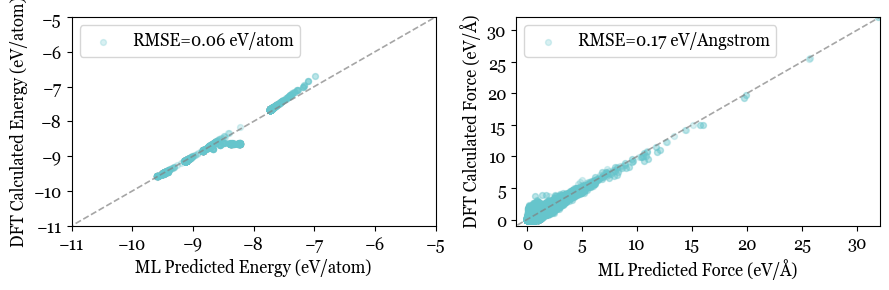

In [33]:
plt.figure(figsize=(9,3))

plt.subplot(121)
parity_plot(pred_energies,dft_energies,'Energy','eV/atom')
plt.xlim(-11,-5),plt.ylim(-11,-5)
plt.legend(fontsize=12)

plt.xlabel('ML Predicted Energy (eV/atom)',fontsize=12),plt.ylabel('DFT Calculated Energy (eV/atom)',fontsize=12)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.subplot(122)
parity_plot(abs_pred_forces,abs_dft_forces,'Absolute Force','eV/Angstrom')
plt.xlim(-1,max(np.array(abs_pred_forces))),plt.ylim(-1,max(np.array(abs_pred_forces)))

plt.xlabel('ML Predicted Force (eV/Å)',fontsize=12),plt.ylabel('DFT Calculated Force (eV/Å)',fontsize=12)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('figures/temp.png',dpi=300,transparent=True)
plt.show()